Here I am going to apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).Features with little variance in the data are then projected into new lower dimension. Then the models are  trained on transformed dataset to apply machine learning models.Then I have applied  Random forest Regressor on old and the transformed datasets and compared them.
If you want to know the basic concept behind Principal Component Analysis check this out.
(https://www.kaggle.com/nirajvermafcb/d/ludobenistant/hr-analytics/principal-component-analysis-explained)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../input/data.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


In [4]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
count,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,41.055743,49427.729801,3.016458,0.291759,0.011509,59.013831,59.160459,0.100169
std,24.768592,22472.238011,2.005325,0.454581,0.106664,6.951850,6.661657,0.300231
min,0.000000,9.000000,0.000000,0.000000,0.000000,32.320000,38.140000,0.000000
25%,24.000000,31818.000000,1.000000,0.000000,0.000000,54.550000,54.550000,0.000000
50%,43.000000,49824.500000,3.000000,0.000000,0.000000,58.800000,58.800000,0.000000
75%,58.000000,68413.000000,5.000000,1.000000,0.000000,63.530000,63.530000,0.000000
max,138.000000,86120.000000,6.000000,1.000000,1.000000,87.170000,87.170000,1.000000


In [5]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
number_people,1.000000,0.516721,-0.198662,-0.212955,-0.023754,0.371589,0.365247,0.188743
timestamp,0.516721,1.000000,0.002188,0.005774,0.000015,0.135663,0.134209,-0.008029
day_of_week,-0.198662,0.002188,1.000000,0.795182,-0.090568,-0.011553,-0.011030,0.005801
is_weekend,-0.212955,0.005774,0.795182,1.000000,-0.069256,0.003095,0.003079,0.003434
is_holiday,-0.023754,0.000015,-0.090568,-0.069256,1.000000,-0.068055,-0.059206,0.083802
apparent_temperature,0.371589,0.135663,-0.011553,0.003095,-0.068055,1.000000,0.995839,0.092622
temperature,0.365247,0.134209,-0.011030,0.003079,-0.059206,0.995839,1.000000,0.092255
is_start_of_semester,0.188743,-0.008029,0.005801,0.003434,0.083802,0.092622,0.092255,1.000000


Let us find if there is any relationship between temperature and apparent_temperature

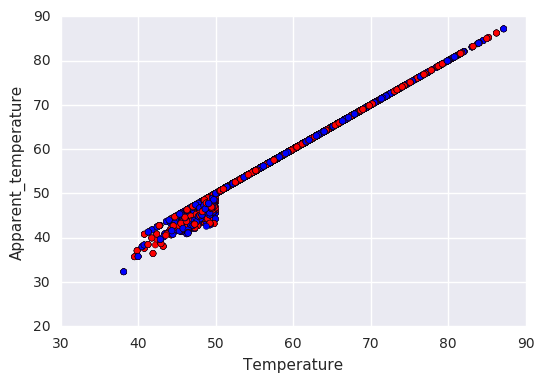

In [6]:
x=df['temperature']
y=df['apparent_temperature']
colors=('r','b')
plt.xlabel('Temperature')
plt.ylabel('Apparent_temperature')
plt.scatter(x,y,c=colors)

The temperture given here is in fahrenheit.We will convert it into Celsius using the formula 
**Celsius=(Fahrenheit-32)* (5/9)**

In [7]:
Fahrenheit=df['temperature']

Converting it into the list so we can apply lambda function

In [8]:
F=Fahrenheit.tolist()

Applying Lambda function

In [9]:
C= map(lambda x: (float(5)/9)*(x-32),F)
Celsius=(list(C))

Converting list to series

In [10]:
temperature_celsius=pd.Series(Celsius)

Applying the series to temperature column

In [11]:
df['temperature']= temperature_celsius
df['temperature']
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,17.222222,0
1,0,906,5,1,0,63.0,17.222222,0
2,0,1207,5,1,0,63.0,17.222222,0
3,0,1507,5,1,0,63.0,17.222222,0
4,0,1808,5,1,0,63.0,17.222222,0


Thus we have converted the temperature column from fahrenheit to degree celsius.Similarly we are now converting apparent_temperature to degree celsius.

In [12]:
at_fahrenheit=df['apparent_temperature']
at_F=at_fahrenheit.tolist()
at_C= map(lambda x: (float(5)/9)*(x-32),at_F)
at_Celsius=(list(C))
at_celsius=pd.Series(at_Celsius)
at_celsius

Series([], dtype: float64)

In [13]:
apparent_temperature_celsius=pd.Series(at_Celsius)
print(apparent_temperature_celsius)

Series([], dtype: float64)


In [14]:
df['apparent_temperature']= temperature_celsius
df['apparent_temperature']
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,17.222222,17.222222,0
1,0,906,5,1,0,17.222222,17.222222,0
2,0,1207,5,1,0,17.222222,17.222222,0
3,0,1507,5,1,0,17.222222,17.222222,0
4,0,1808,5,1,0,17.222222,17.222222,0


In [15]:
X = df.iloc[:,1:8]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
#X
#y

In [16]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
number_people,1.000000,0.516721,-0.198662,-0.212955,-0.023754,0.365247,0.365247,0.188743
timestamp,0.516721,1.000000,0.002188,0.005774,0.000015,0.134209,0.134209,-0.008029
day_of_week,-0.198662,0.002188,1.000000,0.795182,-0.090568,-0.011030,-0.011030,0.005801
is_weekend,-0.212955,0.005774,0.795182,1.000000,-0.069256,0.003079,0.003079,0.003434
is_holiday,-0.023754,0.000015,-0.090568,-0.069256,1.000000,-0.059206,-0.059206,0.083802
apparent_temperature,0.365247,0.134209,-0.011030,0.003079,-0.059206,1.000000,1.000000,0.092255
temperature,0.365247,0.134209,-0.011030,0.003079,-0.059206,1.000000,1.000000,0.092255
is_start_of_semester,0.188743,-0.008029,0.005801,0.003434,0.083802,0.092255,0.092255,1.000000


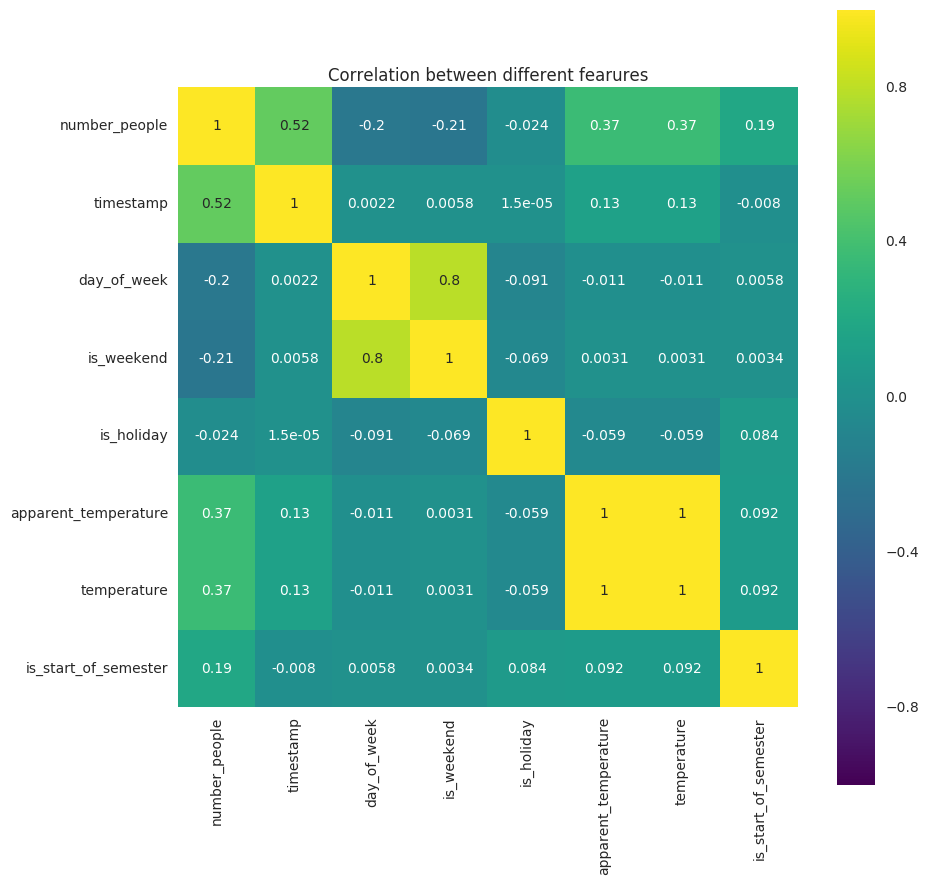

In [17]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Standardising data

In [18]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-2.19905457,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       [-2.15922689,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       [-2.14583233,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       ..., 
       [ 0.10561101, -1.50425286, -0.64183293, ...,  0.57637532,
         0.57637532, -0.33364584],
       [ 0.5185284 , -1.50425286, -0.64183293, ...,  0.43526657,
         0.43526657, -0.33364584],
       [ 0.53183397, -1.50425286, -0.64183293, ...,  0.43526657,
         0.43526657, -0.33364584]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[  3.95611764e-01,  -1.78081261e+00,   1.02236289e-01, ...,
          1.17716664e+00,  -3.94275737e-01,  -2.48929836e-16],
       [  4.02568127e-01,  -1.78093924e+00,   9.77413362e-02, ...,
          1.16422304e+00,  -3.94238582e-01,  -7.30201188e-17],
       [  4.04907641e-01,  -1.78098182e+00,   9.62296257e-02, ...,
          1.15986994e+00,  -3.94226086e-01,  -1.65408011e-16],
       ..., 
       [  7.77050910e-01,   1.49879167e+00,  -4.86264267e-01, ...,
          1.39776045e-01,  -6.04737810e-01,  -1.96298740e-17],
       [  6.54495059e-01,   1.49425867e+00,  -5.29308255e-01, ...,
         -3.03595421e-02,  -6.06178650e-01,  -8.14858450e-19],
       [  6.56819029e-01,   1.49421637e+00,  -5.30809921e-01, ...,
         -3.46837172e-02,  -6.06166237e-01,  -8.52872176e-18]])

In [20]:
pca.get_covariance()

array([[  1.00000000e+00,   2.18839321e-03,   5.77365351e-03,
          1.50144116e-05,   1.34208956e-01,   1.34208956e-01,
         -8.02885396e-03],
       [  2.18839321e-03,   1.00000000e+00,   7.95181803e-01,
         -9.05684631e-02,  -1.10302480e-02,  -1.10302480e-02,
          5.80063302e-03],
       [  5.77365351e-03,   7.95181803e-01,   1.00000000e+00,
         -6.92562742e-02,   3.07858344e-03,   3.07858344e-03,
          3.43411028e-03],
       [  1.50144116e-05,  -9.05684631e-02,  -6.92562742e-02,
          1.00000000e+00,  -5.92059778e-02,  -5.92059778e-02,
          8.38017039e-02],
       [  1.34208956e-01,  -1.10302480e-02,   3.07858344e-03,
         -5.92059778e-02,   1.00000000e+00,   1.00000000e+00,
          9.22549344e-02],
       [  1.34208956e-01,  -1.10302480e-02,   3.07858344e-03,
         -5.92059778e-02,   1.00000000e+00,   1.00000000e+00,
          9.22549344e-02],
       [ -8.02885396e-03,   5.80063302e-03,   3.43411028e-03,
          8.38017039e-02,   9.22

In [21]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([  2.93596458e-01,   2.58705412e-01,   1.53764974e-01,
         1.39472742e-01,   1.25265477e-01,   2.91949375e-02,
         1.97280166e-33])

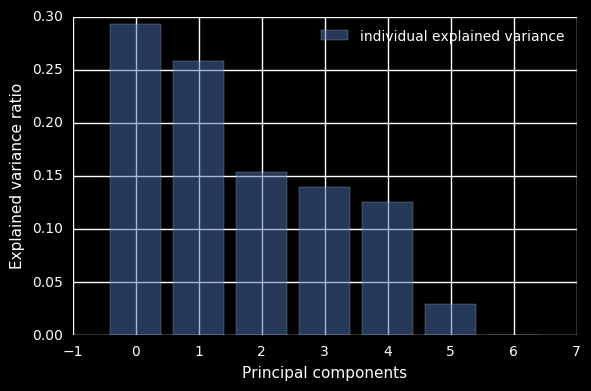

In [22]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Thus we can see from the above plot that  first two components constitute almost 55% of the variance.Third,fourth and fifth components has 42% of the data sprad.The last component has less than 5% of the variance.Hence we can drop the fifth component  **

In [23]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[ 0.39561176, -1.78081261,  0.10223629, -2.03708214,  1.17716664],
       [ 0.40256813, -1.78093924,  0.09774134, -2.0003385 ,  1.16422304],
       [ 0.40490764, -1.78098182,  0.09622963, -1.98798115,  1.15986994],
       ..., 
       [ 0.77705091,  1.49879167, -0.48626427, -0.03710784,  0.13977604],
       [ 0.65449506,  1.49425867, -0.52930826,  0.36845679, -0.03035954],
       [ 0.65681903,  1.49421637, -0.53080992,  0.38073204, -0.03468372]])

In [24]:
pca.get_covariance()

array([[  1.00000000e+00,   2.18839321e-03,   5.77365351e-03,
          1.50144116e-05,   1.34208956e-01,   1.34208956e-01,
         -8.02885396e-03],
       [  2.18839321e-03,   1.00000000e+00,   7.95181803e-01,
         -9.05684631e-02,  -1.10302480e-02,  -1.10302480e-02,
          5.80063302e-03],
       [  5.77365351e-03,   7.95181803e-01,   1.00000000e+00,
         -6.92562742e-02,   3.07858344e-03,   3.07858344e-03,
          3.43411028e-03],
       [  1.50144116e-05,  -9.05684631e-02,  -6.92562742e-02,
          1.00000000e+00,  -5.92059778e-02,  -5.92059778e-02,
          8.38017039e-02],
       [  1.34208956e-01,  -1.10302480e-02,   3.07858344e-03,
         -5.92059778e-02,   1.10218228e+00,   8.97817719e-01,
          9.22549344e-02],
       [  1.34208956e-01,  -1.10302480e-02,   3.07858344e-03,
         -5.92059778e-02,   8.97817719e-01,   1.10218228e+00,
          9.22549344e-02],
       [ -8.02885396e-03,   5.80063302e-03,   3.43411028e-03,
          8.38017039e-02,   9.22

In [25]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([ 0.29359646,  0.25870541,  0.15376497,  0.13947274,  0.12526548])

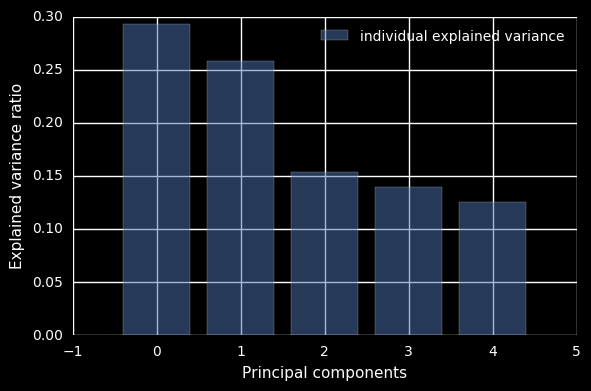

In [26]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(20852, 7)

In [28]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [29]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.85963036952412664, 0.86744577866810968, 0.86832547513793146, 0.87033744260806645, 0.87222068002349973, 0.87120748446329488, 0.87132277215898712, 0.87165976676597212, 0.87065066046187967, 0.8723878718756739, 0.8732572224769608, 0.87408753090595126, 0.87235916017181148, 0.87309720303983218, 0.8729664454080367, 0.87300878471052334, 0.87427791413432587, 0.87360306413131106, 0.87362007853661194]


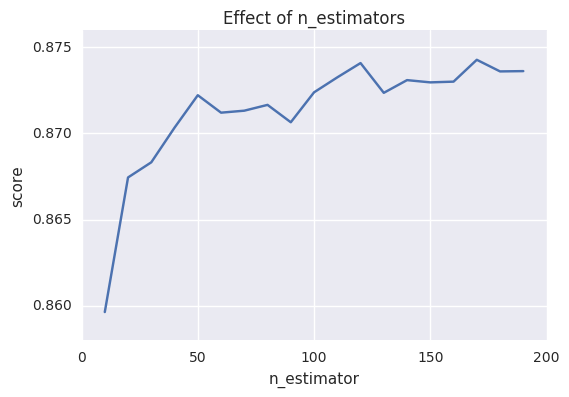

In [30]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(20852, 5)

In [32]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [33]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.80415638552324187, 0.81431932867919499, 0.8157452292030658, 0.81803821197281401, 0.81785567390674785, 0.81962848084976969, 0.82156414668238376, 0.82203573811418273, 0.82016054159945806, 0.81992768950883665, 0.8204614663605404, 0.82073576912270074, 0.82042313590525184, 0.82080071821285849, 0.82251560347419328, 0.82090916728815488, 0.82101865374271077, 0.82087911898661214, 0.82021273168416298]


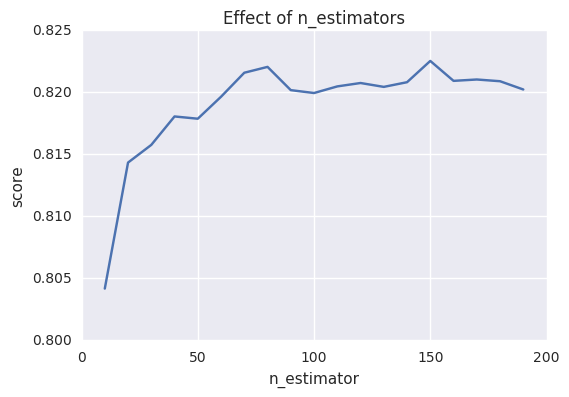

In [34]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

You can find my notebook on Github:
("https://github.com/nirajvermafcb/Data-Science-with-python")